In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(20,20))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [22]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.15,zoom_range=0.1,
                        channel_shift_range=10,horizontal_flip=True)

In [23]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))

In [24]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [25]:
image = np.expand_dims(plt.imread(image_path),0)
print(type(image))
print(image.shape)
print(image)

<class 'numpy.ndarray'>
(1, 239, 320, 3)
[[[[ 25   3  24]
   [ 25   3  24]
   [ 26   5  24]
   ...
   [ 94  67  24]
   [ 93  66  23]
   [ 92  65  22]]

  [[ 20   0  14]
   [ 20   0  12]
   [ 22   2  14]
   ...
   [ 94  67  24]
   [ 93  66  23]
   [ 93  66  23]]

  [[ 18   0   0]
   [ 19   0   1]
   [ 23   1   3]
   ...
   [ 96  67  25]
   [ 94  67  24]
   [ 94  67  24]]

  ...

  [[ 87  62  42]
   [ 88  63  43]
   [ 90  63  42]
   ...
   [113  74  57]
   [113  74  59]
   [113  74  59]]

  [[ 84  61  43]
   [ 87  62  42]
   [ 88  63  43]
   ...
   [111  72  57]
   [111  72  57]
   [111  71  59]]

  [[ 83  60  42]
   [ 84  61  43]
   [ 87  62  42]
   ...
   [110  71  56]
   [110  70  58]
   [110  70  58]]]]


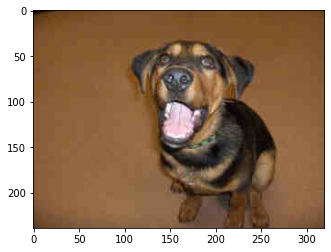

In [26]:
plt.imshow(image[0])

In [27]:
aug_iter = gen.flow(image)
print(type(aug_iter))
print(aug_iter)

<class 'tensorflow.python.keras.preprocessing.image.NumpyArrayIterator'>


In [28]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(20)]

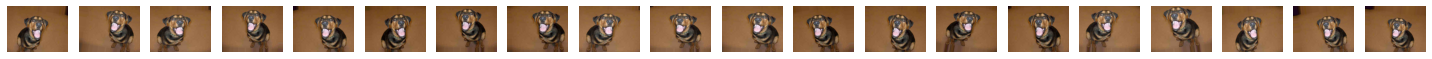

In [29]:
plotImages(aug_images)

In [30]:
aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog/', save_prefix='aug-image-', save_format='jpeg')